<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/Assignment2/HW2(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2(2)-using data augmentation

## Loading the CIFAR10 data set

In [0]:
import keras 
import numpy as np
from random import seed
from random import randrange
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Preprocessing

In [0]:
# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# validation_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=train_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               16777728  
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

In [0]:
#split into validation set and training set at the rate of 8:2
i = 40000
training_images = train_images[:i]
valid_images = train_images[:-i]
training_labels = train_labels[:i]
valid_labels = train_labels[:-i]
#
train_datagen.fit(training_images)
# validation_datagen.fit(valid_images)

In [27]:
history = network.fit_generator(train_datagen.flow(training_images, training_labels,
                                     batch_size=128),
                        steps_per_epoch=1000,
                        epochs=epochs,
                        validation_data=(valid_images, valid_labels),
                        validation_steps=50)

Epoch 1/30
1000/1000 [==============================] - 87s 87ms/step - loss: 2.2362 - acc: 0.1504 - val_loss: 2.1174 - val_acc: 0.2363
Epoch 2/30
1000/1000 [==============================] - 85s 85ms/step - loss: 2.1255 - acc: 0.2028 - val_loss: 2.0352 - val_acc: 0.2700
Epoch 3/30
1000/1000 [==============================] - 86s 86ms/step - loss: 2.0900 - acc: 0.2241 - val_loss: 1.9975 - val_acc: 0.2741
Epoch 4/30
1000/1000 [==============================] - 85s 85ms/step - loss: 2.0644 - acc: 0.2379 - val_loss: 1.9649 - val_acc: 0.2863
Epoch 5/30
1000/1000 [==============================] - 87s 87ms/step - loss: 2.0435 - acc: 0.2512 - val_loss: 1.9289 - val_acc: 0.3006
Epoch 6/30
1000/1000 [==============================] - 87s 87ms/step - loss: 2.0251 - acc: 0.2618 - val_loss: 1.8943 - val_acc: 0.3138
Epoch 7/30
1000/1000 [==============================] - 86s 86ms/step - loss: 2.0069 - acc: 0.2706 - val_loss: 1.8731 - val_acc: 0.3311
Epoch 8/30
1000/1000 [==========================

In [28]:
scores = network.evaluate(test_images, test_labels)
# scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 168us/step
Test loss: 1.6664636888504027
Test accuracy: 0.4145


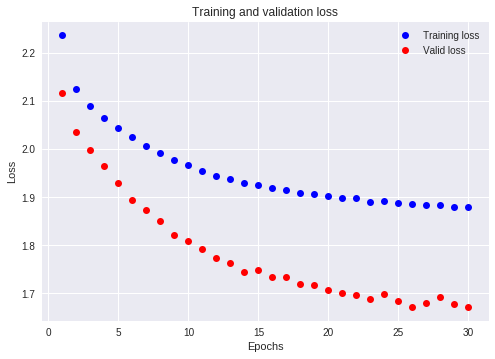

In [31]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

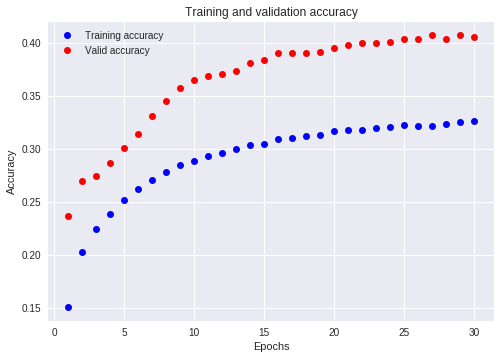

In [33]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
